In [1]:
!pip install pandas

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Usando 'agg' para ter uma renderização melhor dos gráficos
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Para importar arquivos do matplotlib em .PNG ou .JPEG
%matplotlib inline

import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from google.colab import files
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files
from google.colab import drive



In [3]:
#DEFININDO SEMENTE DE TESTES 'SEED 42'
np.random.seed(42)

print('Bibliotecas importadas com sucesso.')

Bibliotecas importadas com sucesso.


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# UPLOAD DO ARQUIVO .CSV PARA O PHYTON
df = pd.read_csv('/content/drive/MyDrive/TI/Projeto.csv')
display(df.head())

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000


In [6]:
df.tail()

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
3495,3496,15,Female,Africa,Low,High School,Part-time/Shift,6.41,119,308,...,2.950001,4.772862,9.0,7.076726,2.4,59.0,0,Laptop,84.0,29.6
3496,3497,28,Female,Europe,High,Bachelor,Part-time/Shift,4.21,55,415,...,3.124953,5.520824,2.0,1.000000,8.9,27.0,1,Laptop,73.0,23.2
3497,3498,44,Female,Europe,Lower-Mid,Bachelor,Part-time/Shift,11.51,146,119,...,2.269790,8.518051,11.0,1.783568,7.6,56.0,0,Android,65.0,42.4
3498,3499,29,Female,North America,Low,Master,Full-time Employee,5.13,63,180,...,4.902579,4.238655,8.0,10.000000,2.8,52.0,0,Laptop,63.0,20.5
3499,3500,27,Male,Middle East,Low,Bachelor,Full-time Employee,4.03,87,197,...,4.780323,2.000000,5.0,1.178647,8.4,58.0,0,Laptop,61.0,20.2


In [7]:
# CONTAGEM DE DADOS NULOS BRUTOS:
df_null = df.isnull().sum()
print(df_null)

id                          0
age                         0
gender                      0
region                      0
income_level                0
education_level             0
daily_role                  0
device_hours_per_day        0
phone_unlocks               0
notifications_per_day       0
social_media_mins           0
study_mins                  0
physical_activity_days      0
sleep_hours                 0
sleep_quality               0
anxiety_score               0
depression_score            0
stress_level                0
happiness_score             0
focus_score                 0
high_risk_flag              0
device_type                 0
productivity_score          0
digital_dependence_score    0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
df.head()

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.35,9.93,5.00,6.59,8.00,23.00,0,Android,70.00,25.70
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.91,4.00,4.00,4.13,8.10,35.00,0,Laptop,64.00,30.10
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.89,4.00,8.00,1.43,7.60,15.00,0,Android,65.30,40.60
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.10,7.09,9.00,5.00,7.80,28.00,1,Tablet,80.00,36.68
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.79,7.03,15.00,9.45,4.20,70.00,1,Android,65.30,48.40


In [11]:
contagem = df.nunique()
print(contagem)

id                          3500
age                           38
gender                         2
region                         6
income_level                   4
education_level                4
daily_role                     5
device_hours_per_day        1174
phone_unlocks                324
notifications_per_day        802
social_media_mins            530
study_mins                   330
physical_activity_days         8
sleep_hours                 3499
sleep_quality               3081
anxiety_score               1793
depression_score              28
stress_level                2467
happiness_score              102
focus_score                  101
high_risk_flag                 2
device_type                    4
productivity_score            63
digital_dependence_score     633
dtype: int64


In [12]:
print(df.describe().to_markdown())

|       |      id |        age |   device_hours_per_day |   phone_unlocks |   notifications_per_day |   social_media_mins |   study_mins |   physical_activity_days |   sleep_hours |   sleep_quality |   anxiety_score |   depression_score |   stress_level |   happiness_score |   focus_score |   high_risk_flag |   productivity_score |   digital_dependence_score |
|:------|--------:|-----------:|-----------------------:|----------------:|------------------------:|--------------------:|-------------:|-------------------------:|--------------:|----------------:|----------------:|-------------------:|---------------:|------------------:|--------------:|-----------------:|---------------------:|---------------------------:|
| count | 3500    | 3500       |             3500       |       3500      |                3500     |            3500     |    3500      |               3500       |    3500       |      3500       |      3500       |         3500       |     3500       |        3500       

In [13]:
# Calculando médias interessantes a serem apresentadas:
media_horas_tela = df['device_hours_per_day'].mean()
media_desbloqueios = df['phone_unlocks'].mean()
media_notificacoes = df['notifications_per_day'].mean()

In [17]:
# Todos os calculos em tela:
print("Estatísticas Chave de Uso Digital")
print("-" * 50)
print(f"**Tempo Médio de Tela:** {media_horas_tela:.1f} horas/dia")
print(f"**Média de Desbloqueios de Celular:** {media_desbloqueios:.0f} vezes/dia")
print(f"**Média de Notificações Recebidas:** {media_notificacoes:.0f} por dia")
print("-" * 50)

Estatísticas Chave de Uso Digital
--------------------------------------------------
**Tempo Médio de Tela:** 7.3 horas/dia
**Média de Desbloqueios de Celular:** 147 vezes/dia
**Média de Notificações Recebidas:** 335 por dia
--------------------------------------------------


In [15]:
# Calcula a correlação de Pearson entre quantidade de horas por dia x taxa de ansiedade
correlacao_ansiedade = df['device_hours_per_day'].corr(df['anxiety_score'])

In [19]:
# Correlação entre colunas:
print("Correlação: Horas de Tela x Taxa de Ansiedade")
print("-" * 60)
print(f"O Coeficiente de Correlação (r) é: {correlacao_ansiedade:.2f}")
print("-" * 60)

Correlação: Horas de Tela x Taxa de Ansiedade
------------------------------------------------------------
O Coeficiente de Correlação (r) é: 0.65
------------------------------------------------------------


In [ ]:
## 0.50 a 1.00	Forte/Muito Forte	"Existe uma forte correlação positiva, provando que o tempo de tela é um fator chave no aumento dos níveis de ansiedade." ##

In [20]:
# Calculando a correlação de felicidade:
correlacao_felicidade = df['social_media_mins'].corr(df['happiness_score'])

In [21]:
# Correlação entre mídias sociais x felicidade:
print("Correlação: Tempo em Mídias Sociais vs. Pontuação de Felicidade")
print("-" * 70)
print(f"O Coeficiente de Correlação (r) é: {correlacao_felicidade:.2f}")
print("-" * 70)

Correlação: Tempo em Mídias Sociais vs. Pontuação de Felicidade
----------------------------------------------------------------------
O Coeficiente de Correlação (r) é: -0.01
----------------------------------------------------------------------


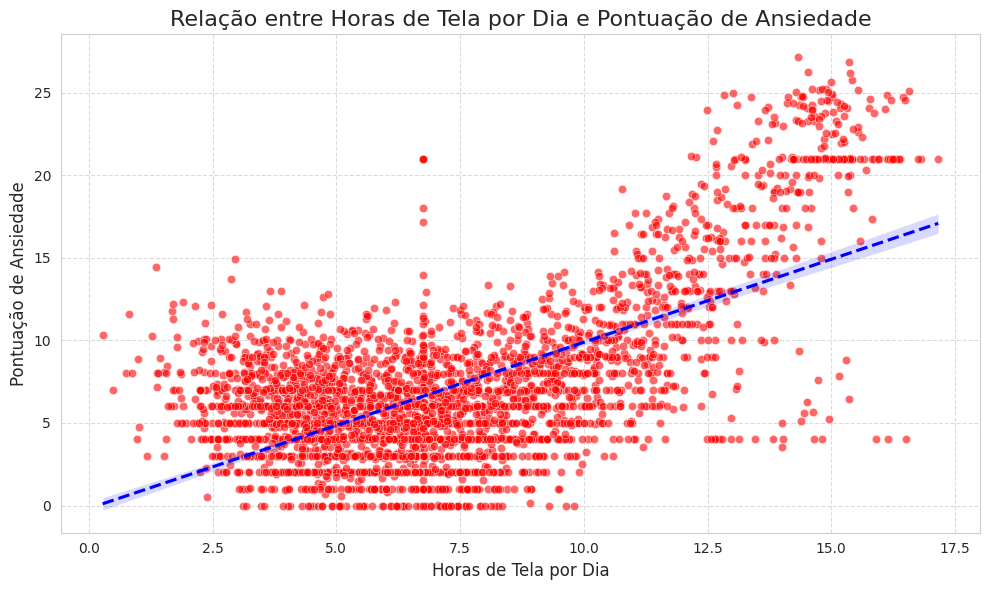

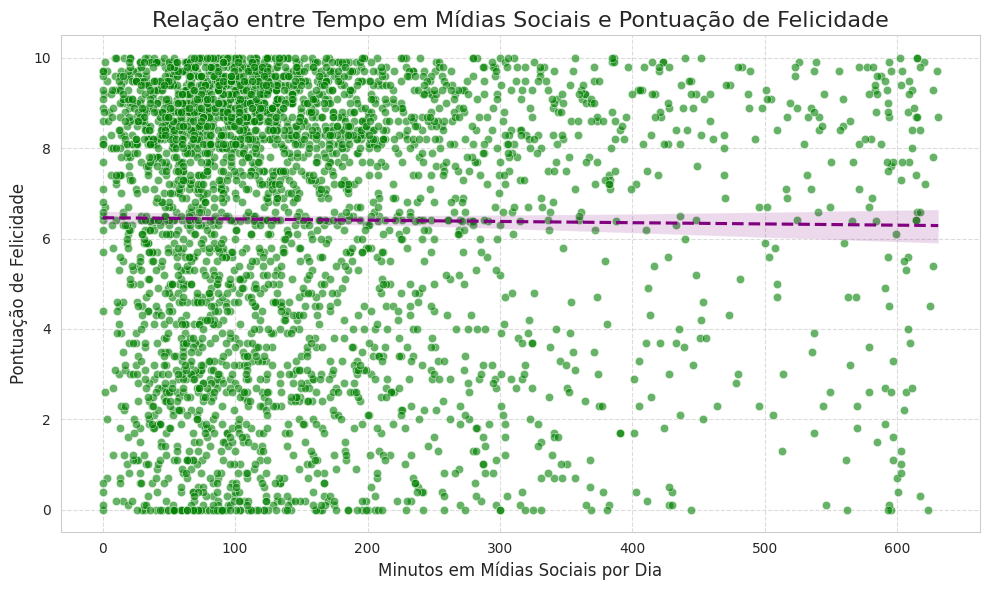

In [22]:
# Gráficos de correlação entre as variáveis:
sns.set_style("whitegrid")

# --- GRÁFICO 1: Horas de Tela vs. Ansiedade ---
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.scatterplot(x='device_hours_per_day', y='anxiety_score', data=df, alpha=0.6, color='red')
sns.regplot(x='device_hours_per_day', y='anxiety_score', data=df, scatter=False, color='blue', line_kws={'linestyle':'--'}) # Linha de tendência
plt.title('Relação entre Horas de Tela por Dia e Pontuação de Ansiedade', fontsize=16)
plt.xlabel('Horas de Tela por Dia', fontsize=12)
plt.ylabel('Pontuação de Ansiedade', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# --- GRÁFICO 2: Tempo em Mídias Sociais vs. Felicidade ---
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.scatterplot(x='social_media_mins', y='happiness_score', data=df, alpha=0.6, color='green')
sns.regplot(x='social_media_mins', y='happiness_score', data=df, scatter=False, color='purple', line_kws={'linestyle':'--'}) # Linha de tendência
plt.title('Relação entre Tempo em Mídias Sociais e Pontuação de Felicidade', fontsize=16)
plt.xlabel('Minutos em Mídias Sociais por Dia', fontsize=12)
plt.ylabel('Pontuação de Felicidade', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [23]:
# Correlação desbloqueio de telefone x produtividade:

# Calcula a correlação de Pearson
correlacao_produtividade = df['phone_unlocks'].corr(df['productivity_score'])

# Formata o resultado
print("Correlação: Desbloqueios do Telefone vs. Produtividade")
print("-" * 70)
print(f"O Coeficiente de Correlação (r) é: {correlacao_produtividade:.2f}")
print("-" * 70)

Correlação: Desbloqueios do Telefone vs. Produtividade
----------------------------------------------------------------------
O Coeficiente de Correlação (r) é: 0.05
----------------------------------------------------------------------


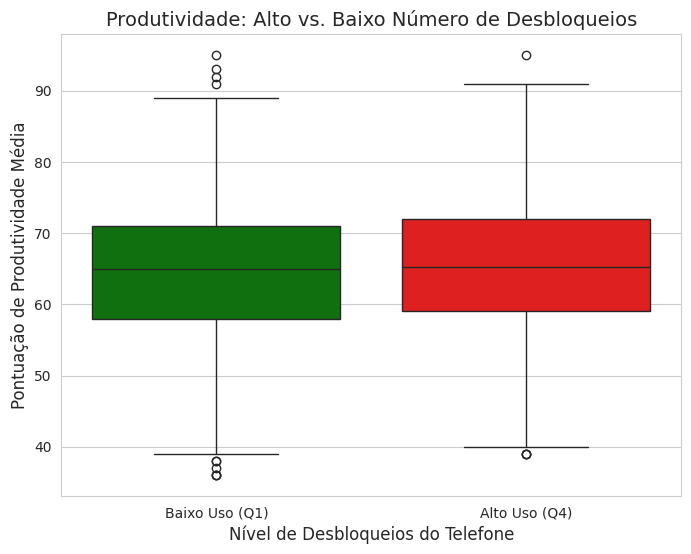

In [24]:
# Criando gráficos para melhor visualização:
sns.set_style("whitegrid")

quartis = df['phone_unlocks'].quantile([0.25, 0.75])
Q1 = quartis[0.25]
Q3 = quartis[0.75]

def categorize_unlocks(unlocks):
    if unlocks <= Q1:
        return 'Baixo Uso (Q1)'
    elif unlocks >= Q3:
        return 'Alto Uso (Q4)'
    else:
        return 'Uso Médio'

df['uso_desbloqueio'] = df['phone_unlocks'].apply(categorize_unlocks)
df_comparacao = df[df['uso_desbloqueio'] != 'Uso Médio'] # Filtra apenas Q1 e Q4 para contraste

plt.figure(figsize=(8, 6))
sns.boxplot(x='uso_desbloqueio', y='productivity_score', data=df_comparacao,
            palette={'Baixo Uso (Q1)': 'green', 'Alto Uso (Q4)': 'red'},
            order=['Baixo Uso (Q1)', 'Alto Uso (Q4)'])

plt.title('Produtividade: Alto vs. Baixo Número de Desbloqueios', fontsize=14)
plt.xlabel('Nível de Desbloqueios do Telefone', fontsize=12)
plt.ylabel('Pontuação de Produtividade Média', fontsize=12)
plt.show()

In [25]:
# Calcula a correlação de Pearson
correlacao_sono_ansiedade = df['sleep_quality'].corr(df['anxiety_score'])

print("Correlação: Qualidade do Sono vs. Ansiedade")
print("-" * 70)
print(f"O Coeficiente de Correlação (r) é: {correlacao_sono_ansiedade:.2f}")
print("-" * 70)

Correlação: Qualidade do Sono vs. Ansiedade
----------------------------------------------------------------------
O Coeficiente de Correlação (r) é: -0.43
----------------------------------------------------------------------


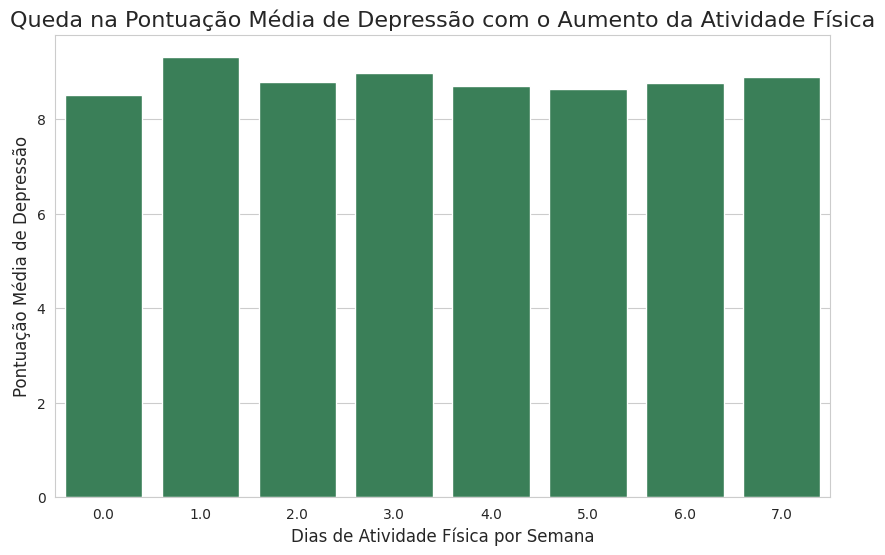

In [26]:
sns.set_style("whitegrid")

# Calcula a média da pontuação de depressão para cada grupo de dias de atividade
depressao_por_atividade = df.groupby('physical_activity_days')['depression_score'].mean().reset_index()

# Criando o Gráfico de Barras
plt.figure(figsize=(10, 6))
# A cor verde é ideal para sinalizar um fator positivo/solução
sns.barplot(x='physical_activity_days', y='depression_score', data=depressao_por_atividade, color='seagreen')

plt.title('Queda na Pontuação Média de Depressão com o Aumento da Atividade Física', fontsize=16)
plt.xlabel('Dias de Atividade Física por Semana', fontsize=12)
plt.ylabel('Pontuação Média de Depressão', fontsize=12)
plt.show()

In [29]:
# Combinando colunas para insights:

df['device_mins_per_day'] = df['device_hours_per_day'] * 60
df['productivity_ratio'] = df['study_mins'] / (df['device_mins_per_day'] + 1)
df.head()

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score,uso_desbloqueio,device_mins_per_day,productivity_ratio
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,6.59,8.00,23.00,0,Android,70.00,25.70,Baixo Uso (Q1),212.40,0.16
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,4.13,8.10,35.00,0,Laptop,64.00,30.10,Uso Médio,339.00,0.30
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,1.43,7.60,15.00,0,Android,65.30,40.60,Uso Médio,532.20,0.26
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,5.00,7.80,28.00,1,Tablet,80.00,36.68,Baixo Uso (Q1),243.00,0.50
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,9.45,4.20,70.00,1,Android,65.30,48.40,Alto Uso (Q4),784.20,0.08


In [30]:
# Normaliza os dados (converte para uma escala de 0 a 1) para que as unidades sejam comparáveis
df['normalized_anxiety'] = df['anxiety_score'] / df['anxiety_score'].max()
df['normalized_activity'] = df['physical_activity_days'] / df['physical_activity_days'].max()

# Combina: (Atividade) - (Ansiedade Normalizada)
# Valores altos na nova coluna representam ALTO BEM-ESTAR.
df['mental_wellness_factor'] = df['normalized_activity'] - df['normalized_anxiety']
df.head()

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,high_risk_flag,device_type,productivity_score,digital_dependence_score,uso_desbloqueio,device_mins_per_day,productivity_ratio,normalized_anxiety,normalized_activity,mental_wellness_factor
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,0,Android,70.00,25.70,Baixo Uso (Q1),212.40,0.16,0.37,1.00,0.63
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,0,Laptop,64.00,30.10,Uso Médio,339.00,0.30,0.15,0.29,0.14
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,0,Android,65.30,40.60,Uso Médio,532.20,0.26,0.15,0.14,-0.00
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,1,Tablet,80.00,36.68,Baixo Uso (Q1),243.00,0.50,0.26,0.57,0.31
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,1,Android,65.30,48.40,Alto Uso (Q4),784.20,0.08,0.26,0.14,-0.12
